### 병합군집(Agglomrative Clustering)

`병합군집알고리즘`은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그 다음 특정 종료조건을 만족할 때까지 가장 비슷한 클러스터를 합쳐 나가는 알고리즘이다. scikit-learn에서 사용하는 `종료조건은 클러스터의 개수`로 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스트를 합친다.`linkage`옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다. 측정방법은 항상 두개의 클러스터 사이에서 이뤄진다.

병합군집은 `계층적군집 Hierarchical clustering`을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 즉, 작은 클러스터들이 모여서 큰 클러스터를 이루는 계층적 구조를 가지는 것이다.

* 계측적 군집
 - 계층적 군집: 계층적군집이란 계층적 트리모형을 이용하여 개별 데이터 포인트들을 순차적, 계층적으로 유사한 클러스터로 통합하여 군집하를 수행하는 알고리즘이다. k-means알고리즘과는 달리 클러스터의 갯수를 사전에 정하지 않아도 학습을 수행할 수 있다. 계층적군집에는 개개의 포인트를 순차적으로 병합하는 `상향식 병합군집방식 Agglomerative Clustering`과 전체를 하나의 클러터로 보고 그것을 분할해 나가는 `하향식 분할군집 방식 Divisive Clustering`이 있다.
 
* sciikit-learn에서 구현된 옵션
 - `word`: 기본값인 word 연결(linkage)은 모든 클러스터 내의 분산을 가작 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비슷한 클러스터가 만들어 진다.
 - `average` : average 연결은 클러스터 포인트 사이에 평균거리가 가장 짧은 두 클러스터를 합친다.
 - `complete`: complete 연결(최대연결)은 클러스터 포인트 사이의 거리가 가장 짧은 두 클러스터를 합친다.
 - word옵션이 대부분의 데이터셋에 알맞기 때문에 이 옵션을 가장 많이 사용한다.

> 병합군집은 알고리즘 특성상 새로운 데이터 포인트에 대해서는 예측할 수가 없다. 그러므로 병합 군집은 predict함수가 없다.
* 그 대신 훈련세트로 모델을 만들고 클러스 정보를 얻기 위해 `fit_predict()함수`를 사용한다.
* 병합군집은 `적절한 클러스터의 갯수를 선택`하는데 도움이 된다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
# plt.rcParams['figure.dpi']=100
# plt.rcParams['image.cmap']="gray"
# plt.rcParams['axes.xmargin']=0.05
# plt.rcParams['axes.ymargin']=0.05

import mglearn

##### 실습 1. 병합군집의 과정

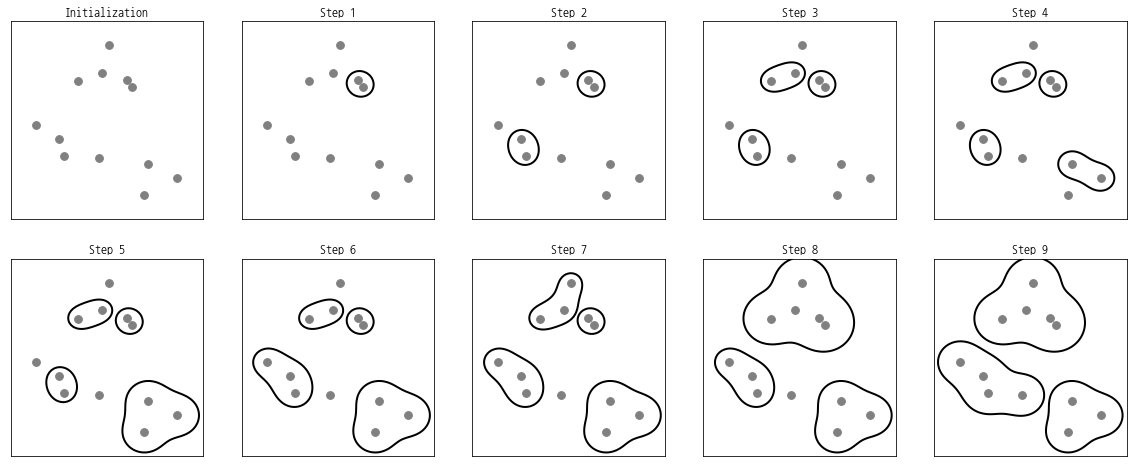

In [2]:
# 예를 들어 세개의 클러스터를 찾는다고 가정한 병합 군집의 과정
mglearn.plots.plot_agglomerative_algorithm()

# 결과분석
# 초기에는 각 데이터포인트 하나하나가 클러스터이다. 그 다음단계에서 가장 가까운 두 클러스터가 합쳐진다. 
# step4 까지는 포인트가 하나 뿐인 클러스가 합쳐져서 두개의 포인트를 갖는 하나의 클러스터가 되었다. 
# step5에서 2개의 포인트를 갖는 클러스터들이 세개의 포인트로 확장된다. 이런식으로 계속 진행하게 되어 3개의 
# 클러스터를 찾는다고 지정했다면 이 알고리즘은 여기서 중지하게 된다.

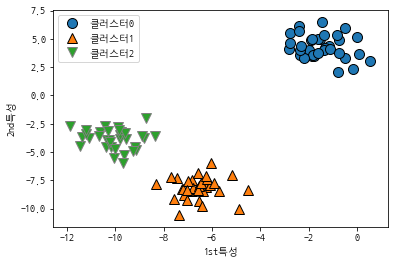

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y=make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(["클러스터0","클러스터1","클러스터2"],loc="best")
plt.xlabel("1st특성"); plt.ylabel("2nd특성")
plt.show()

##### 실습 2. 계층적군집(Hierachiccal Clustering)과 멘드로그램(Dendrogram)

병합군집은 `계층적 군집`을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 각 중간단계는 데이터에 대한 (각기 다른 갯수의) 클러스터를 생성한다. 이는 가능한 모든 클러스터를 연결해 보는데 도움이 된다.

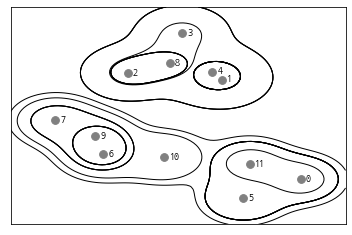

In [12]:
# 병합군집으로 생성한 계층적 군집과 번호가 매겨진 데이터 포인트의 예제
mglearn.plots.plot_agglomerative()

# 결과분석
# 아래 그래프는 계층군집의 모습을 자세하게 나타내지만 2차원 데이터이며 특성이 3개 이상인 데이터 셋은 
# 그래프를 그릴 수 없기 때문에 사용할 수 있다.
# 계층적 군집을 시각화 도구는 덴드로그램을 사용하여 다차원 데이터셋을 처리할 수가 있다.
# scikit-learn에서는 아직까지 지원하지 않지만 scipy를 사용해서 쉽게 그릴 수가 있다.

scikit_learn에서는 덴드로그래프를 그리는 기능을 제공하지 않지만 `scipy`에서는 덴드로그램을 지원하는데 
`scipy군집알고리즘`은 scikit-learn군집 알고리즘과는 인터페이스가 조금 다르다.`scipy`에서는 데이터 배열 X를 받아 계층군집의 유사도가 들어 있는 연결배열 `linkage array`를 반환하는 함수를 제공한다. 이 연결배열을 `scipy의 dendrogram함수`에 전달하면 멘드로그램그래프를 그릴 수가 있다. 

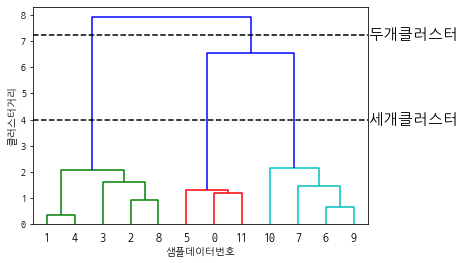

In [43]:
# scipy에서 ward군집함수와 덴드로그램 함수를 import
from scipy.cluster.hierarchy import dendrogram, ward # 계층적 군집화를 하기 위한 함수 

X, y = make_blobs(random_state=0,n_samples=12)

# 데이터배열 X에 ward함수를 적용한다.
# scipy의 ward함수는 병합군집을 수행할 때 생성된 거리정보가 담긴 배열을 리턴한다.
linkage_array = ward(X)
# linkage_ward # 거리에 대한 정보 / np.ndarray이다.
# 클러스터간의 거리정보가 담긴 linkage_array를 사용해 덴드로그램 그리기
dendrogram(linkage_array)

# 각 클러스터를 구분하는 커트라인 그리기 
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25,7.25],'--',c='k')
ax.plot(bounds, [4,4],'--',c='k')
ax.text(bounds[1],7.25,'두개클러스터',va='center',fontdict={'size':15})
ax.text(bounds[1],4,'세개클러스터',va='center',fontdict={'size':15})
plt.xlabel("샘플데이터번호")
plt.ylabel('클러스터거리')
plt.show()

# 결과분석
# 덴드로그램의 y축이 단순히 두 클러서터가 합쳐지는 것만 나타내는 것이 아니라 합쳐진 클러스터가 얼마나
# 떨어져 있는지를 보여준다. 이 가지의 길이는 합쳐진 클러스터가 떨어져 있는 거리를 나타낸다.


In [40]:
bounds

(0.0, 120.0)

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])